<a href="https://colab.research.google.com/github/jeevith2011/mini-projects-basics/blob/main/MiniProject_5_ForestFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Tips**
Some tips that will get you started (and help you when you're confused)

##Weekly meeting tips


1.   These meeting are recorded! Keep it short and sweet!
2.   Describe your what you achieved in code in 5-10 minutes.
3.   What is blocking you? Any blockers? Explain it in a weekly meeting.



## Confused? Here's the steps to finish the project:


1. Read the readme document
2. Watch pair coding videos in order by date
3. Code with the videos
4. If you have any problems, describe it in a weekly meeting and it will be fixed
5. When done, push to Git/GitHub
6. Also, make a presentation about what you learned
7. Once completed with the whole section, do the final report

**Also, make sure to change the compute engine when switching miniprojects.**

**That's it!**

### **If you are experiencing issues with setup scripts, add the Zoom-Recordings-Common folder after the MyDrive folder.**

# **Setup Script**

In [2]:
from google.colab import drive
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# NOTE: this will pop up asking for google login permission
drive.mount('/content/drive')
# linux command to list the files under linux running
#Colab Jupyter notebook (prints dir/files/links in your Drive)

# Airport ID, Name of airport, City, Country, IATA, ICAO, Latitude, Longitude, Altitude, Timezone, DST, TZ Database Timezone, Type, Source
# See https://openflights.org/data.php for help

!ls -ltr /content/drive/MyDrive/ | grep *.csv
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire | grep dataset
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv | grep dataset

Mounted at /content/drive
ls: /content/drive/MyDrive/Zoom-Recordings-Common: No such file or directory
total 52
dr-x------ 2 root root 4096 Feb 26  2022 dataset-titanic
dr-x------ 2 root root 4096 Feb 26  2022 dataset-powerlifting-csv
dr-x------ 2 root root 4096 Feb 26  2022 dataset_open_crime_uk
dr-x------ 2 root root 4096 Feb 26  2022 dataset-google-scholar
dr-x------ 2 root root 4096 Feb 26  2022 dataset_ebola
dr-x------ 2 root root 4096 Feb 26  2022 dataset-domestic-flights-from-1990-to-2009
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid-2
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid
dr-x------ 2 root root 4096 Feb 26  2022 dataset-airports
dr-x------ 2 root root 4096 Mar  5  2022 dataset-museum-artifacts
dr-x------ 2 root root 4096 Mar  5  2022 dataset-world-economy-worldbank
dr-x------ 2 root root 4096 Jun 21  2023 dataset-hr
dr-x------ 2 root root 4096 Nov 11 19:19 dataset-forest-fire
-r-------- 1 root root 25478 Sep 21  2019 /content/drive/MyDrive/Zoom-Recordi

# TASK 1

Top 10 maximum burnt area happened on which month.
Output:
month,area


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1) # remove unnecessary columns

df = df.groupby('month') \
    .area \
    .sum() \
    .to_frame('area_sum') \
    .head(10) # sorting months by amount of hectares burned

df = df.sort_values('area_sum', ascending=False)

print(df)

       area_sum
month          
aug     2297.99
jul      459.83
mar      235.26
feb      125.50
dec      119.97
jun       99.30
apr       80.02
may       38.48
jan        0.00
nov        0.00


# TASKS 2 - 4

**Task 2** \
Highest temperature and lowest temperature for each month. \
Output:
month,highest_temp, lowest_temp


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
dfmax = df.groupby('month') \
    .temp \
    .max() \
    .to_frame('max_temp')

# getting min temperatures
dfmin = df.groupby('month') \
    .temp \
    .min() \
    .to_frame('min_temp')

dfmax['min_temp'] = dfmin['min_temp'] # combine columns

# no need to sort, this is not top 10

print(dfmax)

       max_temp  min_temp
month                    
apr        17.6       5.8
aug        33.3       5.1
dec         5.1       2.2
feb        15.7       4.2
jan         5.3       5.2
jul        30.2      12.6
jun        28.0      10.6
mar        18.8       5.3
may        18.0      11.3
nov        11.8      11.8
oct        21.7      11.3
sep        30.2       9.8


**Task 3** \
Monthly when highest wind and lowest wind happened. \
Output:
month,highest_wind, lowest_wind


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
dfmax = df.groupby('month') \
    .wind \
    .max() \
    .to_frame('max_wind')

# getting min temperatures
dfmin = df.groupby('month') \
    .wind \
    .min() \
    .to_frame('min_wind')

dfmax['min_wind'] = dfmin['min_wind'] # combine columns

# no need to sort, this is not top 10

print(dfmax)

       max_wind  min_wind
month                    
apr         9.4       1.8
aug         8.9       0.4
dec         8.5       4.9
feb         9.4       0.9
jan         3.1       0.9
jul         8.0       0.9
jun         9.4       1.3
mar         9.4       0.9
may         4.9       4.0
nov         4.5       4.5
oct         5.4       0.9
sep         7.6       0.9


**Task 4** \
Highest and lowest relative humidity for each month.
Output: \
month,highest_rh, lowest_rh


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
dfmax = df.groupby('month') \
    .RH \
    .max() \
    .to_frame('max_rh')

# getting min temperatures
dfmin = df.groupby('month') \
    .RH \
    .min() \
    .to_frame('min_rh')

dfmax['min_rh'] = dfmin['min_rh'] # combine columns

# no need to sort, this is not top 10

print(dfmax)

       max_rh  min_rh
month                
apr        75      20
aug        96      19
dec        61      21
feb        82      35
jan       100      78
jul        90      22
jun        90      25
mar        99      18
may        94      40
nov        31      31
oct        60      24
sep        86      15


# TASK 5
Join the output from questions 1-4 above. \
Output: \
month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh


In [7]:
import pandas as pd

### TASK 1 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1) # remove unnecessary columns

df = df.groupby('month') \
    .area \
    .sum() \
    .to_frame('area_sum') \
    .head(10) # sorting months by amount of hectares burned

df1 = df.sort_values('area_sum', ascending=False)

### TASK 2 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df2 = df.groupby('month') \
    .temp \
    .max() \
    .to_frame('max_temp')

# getting min temperatures
dfmin = df.groupby('month') \
    .temp \
    .min() \
    .to_frame('min_temp')

df2['min_temp'] = dfmin['min_temp'] # combine columns

# no need to sort, this is not top 10

### TASK 3 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df3 = df.groupby('month') \
    .wind \
    .max() \
    .to_frame('max_wind')

# getting min temperatures
dfmin = df.groupby('month') \
    .wind \
    .min() \
    .to_frame('min_wind')

df3['min_wind'] = dfmin['min_wind'] # combine columns

### TASK 4 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df4 = df.groupby('month') \
    .RH \
    .max() \
    .to_frame('max_rh')

# getting min temperatures
dfmin = df.groupby('month') \
    .RH \
    .min() \
    .to_frame('min_rh')

df4['min_rh'] = dfmin['min_rh'] # combine columns\

### RESULT ###

# combining dataframes
result = pd.concat([df1, df2, df3, df4], axis=1)

print(result)

       area_sum  max_temp  min_temp  max_wind  min_wind  max_rh  min_rh
month                                                                  
aug     2297.99      33.3       5.1       8.9       0.4      96      19
jul      459.83      30.2      12.6       8.0       0.9      90      22
mar      235.26      18.8       5.3       9.4       0.9      99      18
feb      125.50      15.7       4.2       9.4       0.9      82      35
dec      119.97       5.1       2.2       8.5       4.9      61      21
jun       99.30      28.0      10.6       9.4       1.3      90      25
apr       80.02      17.6       5.8       9.4       1.8      75      20
may       38.48      18.0      11.3       4.9       4.0      94      40
jan        0.00       5.3       5.2       3.1       0.9     100      78
nov        0.00      11.8      11.8       4.5       4.5      31      31
oct         NaN      21.7      11.3       5.4       0.9      60      24
sep         NaN      30.2       9.8       7.6       0.9      86 

# TASK 6
Plot a group bar chart for the output in question 5. \

*X-axis -> Month* \
*Bar 1 -> highest_temp* \
*Bar 2 -> highest_wind* \
*Bar 3 -> highest_rh* \

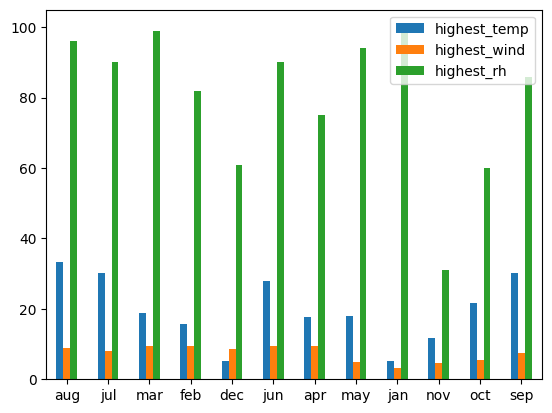

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


### TASK 1 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1) # remove unnecessary columns

df = df.groupby('month') \
    .area \
    .sum() \
    .to_frame('area_sum') \
    .head(10) # sorting months by amount of hectares burned

df1 = df.sort_values('area_sum', ascending=False)

### TASK 2 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df2 = df.groupby('month') \
    .temp \
    .max() \
    .to_frame('max_temp')

# getting min temperatures
dfmin = df.groupby('month') \
    .temp \
    .min() \
    .to_frame('min_temp')

df2['min_temp'] = dfmin['min_temp'] # combine columns

# no need to sort, this is not top 10

### TASK 3 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df3 = df.groupby('month') \
    .wind \
    .max() \
    .to_frame('max_wind')

# getting min temperatures
dfmin = df.groupby('month') \
    .wind \
    .min() \
    .to_frame('min_wind')

df3['min_wind'] = dfmin['min_wind'] # combine columns

### TASK 4 ###

df = pd.read_csv("/content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-forest-fire/forestfires.csv")
df.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12]], axis=1) # remove unnecessary columns

# getting max temperatures
df4 = df.groupby('month') \
    .RH \
    .max() \
    .to_frame('max_rh')

# getting min temperatures
dfmin = df.groupby('month') \
    .RH \
    .min() \
    .to_frame('min_rh')

df4['min_rh'] = dfmin['min_rh'] # combine columns\

### MERGING ###

# combining dataframes
result = pd.concat([df1, df2, df3, df4], axis=1)

## PLOTTING ##

# creating dataframe with columns for plotting
plotdf = pd.DataFrame(
    {'highest_temp': result.max_temp.to_list(),
     'highest_wind': result.max_wind.to_list(),
     'highest_rh': result.max_rh.to_list()},
    index=result.index.to_list()
)

# df.plot can be used with ease over here (matplotlib)

ax = plotdf.plot.bar(rot=0)